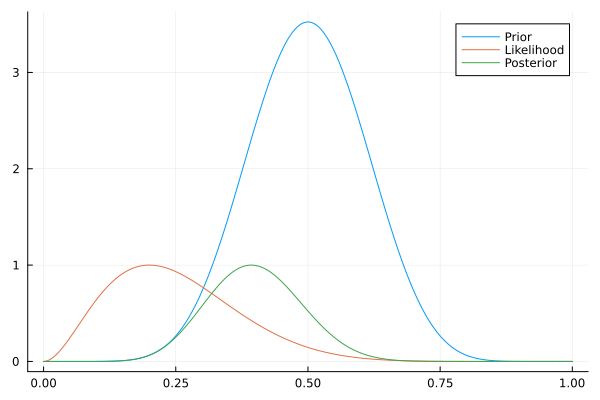

In [97]:
using Distributions;
using Plots


alpha_prior, beta_prior = 10, 10
theta_true = 0.25
prior = Beta(alpha_prior, beta_prior)
bin = Binomial(1, theta_true)

y_data = rand(bin, 10)


#y_ll = [loglikelihood(Binomial(1, p_i), y) for p_i in range(0.001, 0.999, length = 100)]

x = range(0, 1, length = 1000)

y_prior = [pdf(prior, x_i) for x_i in x]
y_lik = [prod(pdf.(Binomial(1, p_i), y_data)) for p_i in x]
y_lik = (y_lik .- minimum(y_lik)) ./ (maximum(y_lik) .- minimum(y_lik))


post = Beta(alpha_prior + sum(y_data), beta_prior + length(y_data) - sum(y_data))
y_post = [pdf(post, x_i) for x_i in x]
y_post = (y_post .- minimum(y_post)) ./ (maximum(y_post) .- minimum(y_post))

plot(x, y_prior, label = "Prior")
plot!(x, y_lik, label = "Likelihood")
plot!(x, y_post, label = "Posterior")

In [98]:
n_list = Int.(unique(round.(exp10.(range(0, 5, length = 100)))))

theta_true = 0.25
prior = Beta(alpha_prior, beta_prior)


post_mean = []
post_var  = []
for n in n_list
    bin = Binomial(1, theta_true)
    y_data = rand(bin, n)

    post = Beta(alpha_prior + sum(y_data), beta_prior + length(y_data) - sum(y_data))

    push!(post_mean, mean(post))
    push!(post_var, var(post))


end

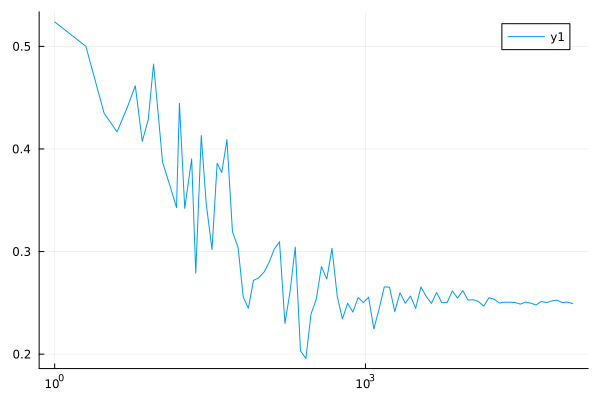

In [101]:
plot(n_list, post_mean, xaxis=:log)